# Data Understanding

## Data Semantics

In [3]:
# imports of the libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [4]:
# read of the two files: training.csv and test.csv
df1 = pd.read_csv('Data/training.csv')
df2 = pd.read_csv('Data/test.csv') 
# creation of one single table appending df2 to df1, if we'll need to work with the full dataset
df = df1.append(df2)

In [0]:
# visualization of the first 5 records, for example
df1.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623


In [0]:
# visualization of the attributes' names and types 
df1.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [0]:
# generic information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

## Distribution of the variables and statistics 

In [0]:
# computation of the statics without 'RefId','WheelTypeID','BYRNO','VNZIP1','IsOnlineSale'
# because these attributes are not actually numerical (they are mainly identifiers) and thereby not informative
dfstats = df1.drop(['RefId','WheelTypeID','BYRNO','VNZIP1','IsOnlineSale'], axis=1)
dfstats.describe()

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
count,58386.000000,58386.000000,58386.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58141.000000,58141.000000,58141.000000,58141.000000,58386.000000,58386.000000
mean,0.123454,2005.344637,4.174956,71478.090518,6128.127953,7372.912699,8497.288558,9851.768061,6131.666655,7389.958652,8776.065118,10145.227034,6730.008335,1276.105042
std,0.328961,1.733307,1.713833,14591.224550,2456.632611,2715.506462,3151.106237,3378.839613,2432.171539,2682.310828,3086.373733,3304.637060,1762.075265,598.885423
min,0.000000,2001.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,462.000000
25%,0.000000,2004.000000,3.000000,61785.000000,4273.000000,5409.000000,6279.000000,7501.000000,4275.000000,5415.000000,6538.000000,7788.000000,5430.000000,837.000000
50%,0.000000,2005.000000,4.000000,73359.000000,6097.000000,7308.000000,8448.000000,9798.000000,6063.000000,7311.000000,8733.000000,10103.000000,6700.000000,1155.000000
75%,0.000000,2007.000000,5.000000,82427.000000,7765.000000,9017.000000,10652.000000,12084.000000,7737.000000,9014.000000,10910.000000,12309.000000,7900.000000,1623.000000
max,1.000000,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,36485.000000,7498.000000


In [0]:
# computation of the correlation without 'RefId', 'BYRNO', 'VNZIP1','WheelTypeID','IsOnlineSale'
# because these attributes are not actually numerical (they are mainly identifiers) and thereby not informative
dfstats = df1.drop(['RefId', 'BYRNO', 'VNZIP1','WheelTypeID','IsOnlineSale'], axis=1)
dfstats.corr()

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
IsBadBuy,1.000000,-0.156926,0.165325,0.082858,-0.105793,-0.099315,-0.084514,-0.080712,-0.106130,-0.101036,-0.100786,-0.097195,-0.098132,0.050259
VehYear,-0.156926,1.000000,-0.958049,-0.283569,0.582416,0.533807,0.582414,0.540206,0.591968,0.549345,0.599415,0.559579,0.349672,-0.267739
VehicleAge,0.165325,-0.958049,1.000000,0.318778,-0.567106,-0.519897,-0.462299,-0.427526,-0.576914,-0.533646,-0.505322,-0.470640,-0.311903,0.257996
VehOdo,0.082858,-0.283569,0.318778,1.000000,-0.018381,0.023717,0.029107,0.061407,-0.030141,0.010755,0.013719,0.046070,-0.064436,0.411273
MMRAcquisitionAuctionAveragePrice,-0.105793,0.582416,-0.567106,-0.018381,1.000000,0.990218,0.910185,0.909832,0.937482,0.931919,0.871220,0.870424,0.789354,-0.049682
MMRAcquisitionAuctionCleanPrice,-0.099315,0.533807,-0.519897,0.023717,0.990218,1.000000,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604,0.781123,-0.019607
MMRAcquisitionRetailAveragePrice,-0.084514,0.582414,-0.462299,0.029107,0.910185,0.902339,1.000000,0.990085,0.851330,0.848776,0.912747,0.905523,0.745718,-0.053507
MMRAcquisitonRetailCleanPrice,-0.080712,0.540206,-0.427526,0.061407,0.909832,0.917934,0.990085,1.000000,0.846393,0.854986,0.902680,0.906231,0.744622,-0.026708
MMRCurrentAuctionAveragePrice,-0.106130,0.591968,-0.576914,-0.030141,0.937482,0.923144,0.851330,0.846393,1.000000,0.990244,0.915147,0.912305,0.778253,-0.056893
MMRCurrentAuctionCleanPrice,-0.101036,0.549345,-0.533646,0.010755,0.931919,0.931599,0.848776,0.854986,0.990244,1.000000,0.908620,0.921638,0.774637,-0.028245


Correlation between Acquisition and Current Average Price of the Retail and of the Auction with VehBCost


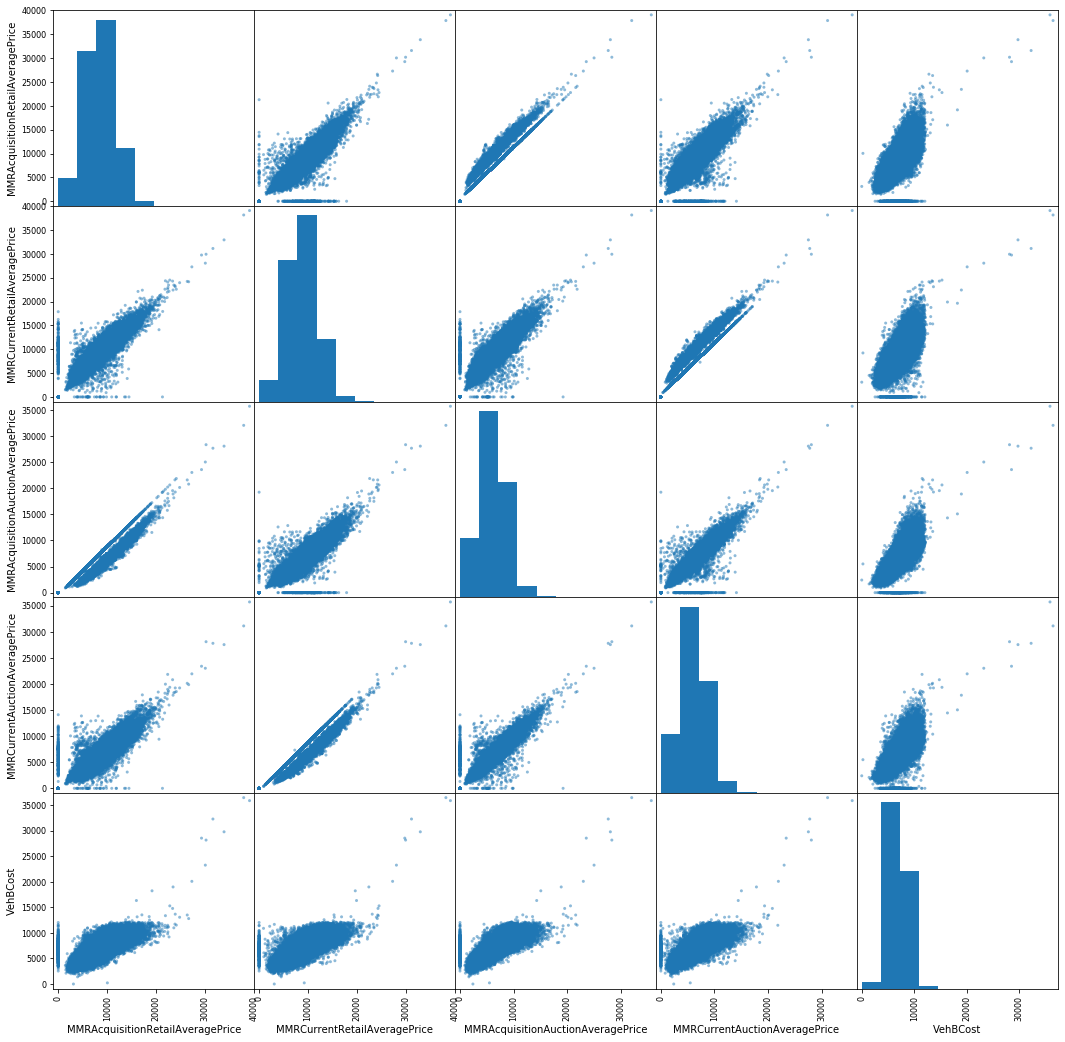

In [0]:
# scatter matrix between Acquisition and Current Average Price of the Retail and of the Auction with VehBCost
print('Correlation between Acquisition and Current Average Price of the Retail and of the Auction with VehBCost')
pd.plotting.scatter_matrix(df1[['MMRAcquisitionRetailAveragePrice', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionAveragePrice', 'VehBCost']], figsize=(18, 18))
plt.show()

The correlation matrix describes the relationship between the variables that are related to the vehicle's cost. For instance, the average price of the aquisition retail and the current retail are strictly correlated: we can discover also some outliers in the right corner of the plot. 
It is possible to noticed that the average price of the aquisition auction has some strong correlation with the average price of current and aquisition retail.

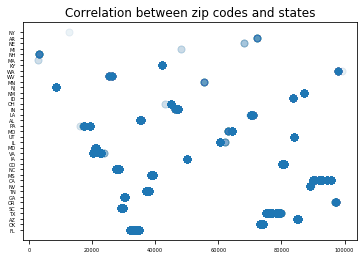

In [0]:
# plotting correlation between zip codes and states
plt.scatter(df1['VNZIP1'], df1['VNST'], s=50, alpha = 0.02)
plt.title('Correlation between zip codes and states')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

This scatter plot has been done to explore the similarity between the zip codes and the states, verifying that more zip codes correspond to one singular state.

Text(0, 0.5, 'Age')

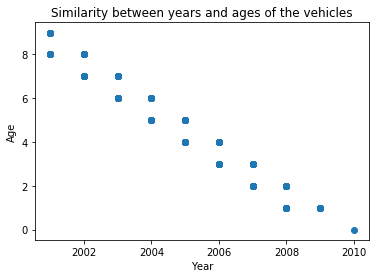

In [0]:
# plotting correlation between VehYear and VehicleAge
plt.scatter(df1['VehYear'], df1['VehicleAge'])
plt.title('Similarity between years and ages of the vehicles')
plt.xlabel('Year')
plt.ylabel('Age')

The scatter plot shows how the years and the ages of the vehicles are similar to each others and how they are strictly connected.

Text(0.5, 1.0, 'How warranty cost depends on the cost of the vehicle?')

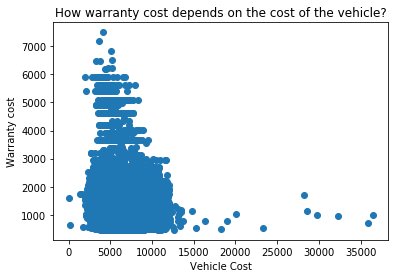

In [0]:
# plotting correlation between VehBCost and WarrantyCost
plt.scatter(df1['VehBCost'], df1['WarrantyCost'])
plt.xlabel('Vehicle Cost')
plt.ylabel('Warranty cost')
plt.title('How warranty cost depends on the cost of the vehicle?')

Here it is possible to see how increasing the vehicle cost does not influence the cost of warranties.

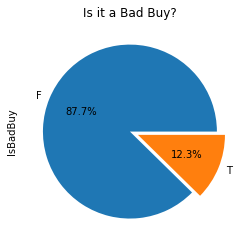

ValueError: could not convert string to float: '10/25/2010'

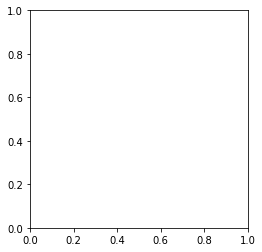

In [6]:
# pie chart counting IsBadBuy
df1['IsBadBuy'].value_counts().plot(kind='pie', 
                                   title='Is it a Bad Buy?',
                                   labels = 'FT',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))
plt.show()

The pie chart shows how many bad buys has been done: 87.7% of the values is 'False', i.e. the vast majority of the purchases turn out to be not "Bad Buy".

In [0]:
# counting Auction values 
df1['Auction'].value_counts()

MANHEIM    32740
OTHER      13994
ADESA      11652
Name: Auction, dtype: int64

Text(0.5, 1.0, 'BadBuy per Auction organization')

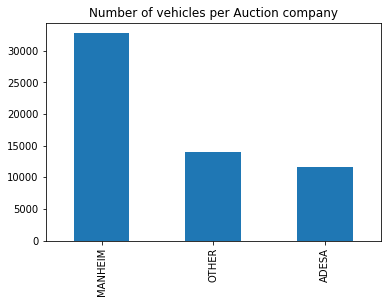

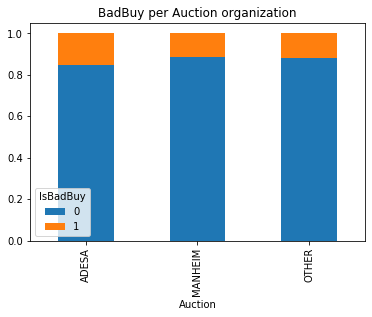

In [0]:
# bar chart counting number of vehicles per Auction
df1['Auction'].value_counts().plot(kind='bar', 
                                   title='Number of vehicles per Auction company')

# Bad Buy per Action organization 
badAuction_val_xt = pd.crosstab(df1['Auction'], df1['IsBadBuy'])
badAuction_val_xt_pct = \
    badAuction_val_xt.div(badAuction_val_xt.sum(1).astype(float), axis=0)
badAuction_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('BadBuy per Auction organization')

In [0]:
# counting TopThreeAmericanName values 
df1['TopThreeAmericanName'].value_counts()

GM          20248
CHRYSLER    18733
FORD         9819
OTHER        9582
Name: TopThreeAmericanName, dtype: int64

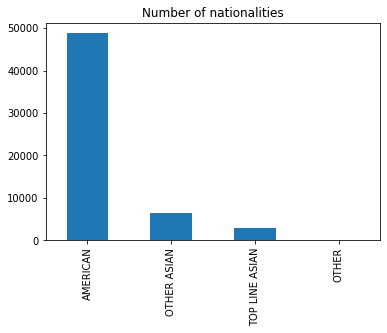

In [0]:
# bar chart counting vehicles' Nationality
df1['Nationality'].value_counts().plot(kind='bar', 
                                   title='Number of nationalities')
plt.show()

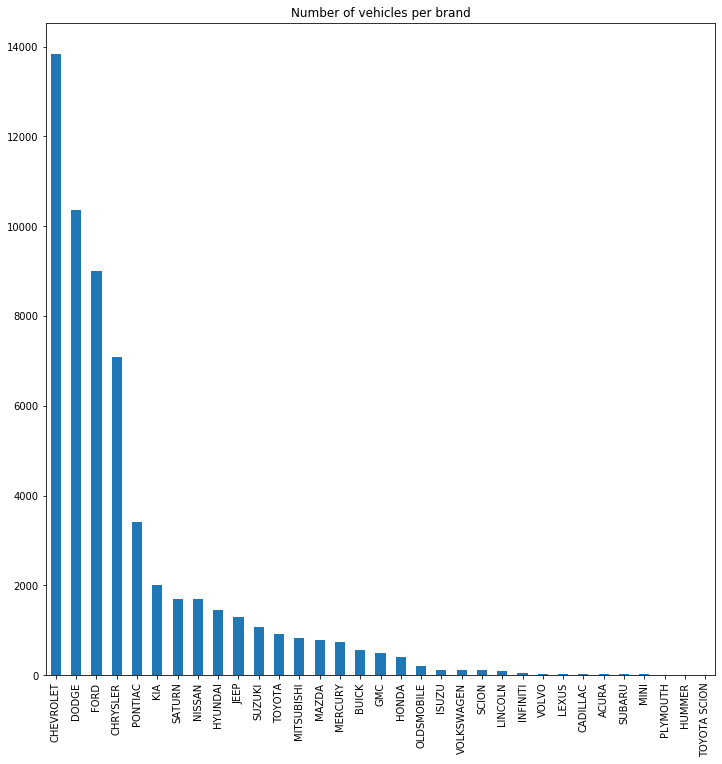

In [0]:
# bar chart counting vehicles' Manifacturer
df1['Make'].value_counts().plot(kind='bar', 
                                   title='Number of vehicles per brand', figsize=(12, 12))
plt.show()

In [0]:
# counting Model values 
df1['Model'].value_counts()

PT CRUISER              1845
IMPALA                  1616
TAURUS                  1154
CALIBER                 1108
CARAVAN GRAND FWD V6    1021
MALIBU 4C                991
SEBRING 4C               941
TAURUS 3.0L V6 EFI       917
PT CRUISER 2.4L I4 S     909
COBALT                   900
1500 RAM PICKUP 2WD      880
IMPALA V6                857
STRATUS V6 2.7L V6 M     792
GRAND PRIX               725
FOCUS                    720
GRAND PRIX 3.8L V6 S     698
IMPALA 3.5L V6 SFI       669
MALIBU 4C 2.2L I4 MP     563
ALTIMA                   559
AVENGER 4C               551
ION                      550
SPECTRA                  544
FORENZA                  519
1500 SILVERADO PICKU     490
MALIBU V6                457
HHR                      447
G6 V6                    443
STRATUS V6               430
UPLANDER FWD V6          423
IMPALA 3.4L V6 SFI       413
                        ... 
626 4C 2.0L I4 EFI         1
GS450H                     1
VUE AWD 4C 2.2L I-4        1
PATHFINDER 4WD

In [0]:
# counting Trim values
df1['Trim'].value_counts()

Bas    11213
LS      8190
SE      7473
SXT     3061
LT      2849
LX      1919
Tou     1828
EX      1703
SEL     1093
XLT     1085
GLS     1083
Spo      999
SLT      946
Lim      761
Lar      697
ST       696
GT       643
XLS      623
2        586
ES       553
S        493
SES      481
ZX4      471
LE       460
SLE      416
i        385
Cla      375
XL       361
Nor      348
GL       327
       ...  
LW2        6
3 R        6
DS         6
C          5
Hig        5
SE-        5
Ral        4
eC         4
XRS        4
Ove        4
ZTW        4
Spe        4
RS         3
250        3
Ent        3
ZR2        3
Car        3
Dur        2
T5         2
Hyb        2
GXP        2
XS         2
Ult        1
Xsp        1
JLX        1
Maz        1
Out        1
JLS        1
LL         1
Si         1
Name: Trim, Length: 131, dtype: int64

In [0]:
# counting Transmission values
df1['Transmission'].value_counts()
# one value, "Manual" should be normalized to MANUAL

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

In [0]:
# counting WheelType values 
df1['WheelType'].value_counts()

Alloy      28735
Covers     26485
Special      589
Name: WheelType, dtype: int64

In [0]:
# counting WheelTypeID values
df1['WheelTypeID'].value_counts()

1.0    28735
2.0    26485
3.0      589
0.0        4
Name: WheelTypeID, dtype: int64

In [0]:
# counting Size values
df1['Size'].value_counts()

MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64

In [0]:
# counting IsOnlineSale values
df1['IsOnlineSale'].value_counts()

0    56887
1     1499
Name: IsOnlineSale, dtype: int64

In [0]:
# counting BYRNO values in order to understand the behaviour of the customers
# i.e. if the same customer buy more vehicles
df1['BYRNO'].value_counts()

99761    3191
18880    2852
835      2398
3453     2362
22916    2285
21053    2267
19619    2173
99750    2136
20928    2099
17675    2066
21973    2010
17212    2006
20740    1895
5546     1775
18111    1707
18822    1689
8655     1688
23359    1673
20234    1641
20833    1604
19638    1490
22808    1466
18881    1380
16044    1309
25100    1308
19662    1211
20207    1068
16926    1066
52117     972
8172      886
         ... 
21047     117
1191       83
53245      67
1051       55
1151       54
1045       52
1085       43
10310      39
1081       30
11410      28
1031       26
1121       17
1141       14
1156        9
1035        9
18091       9
10410       8
1125        7
1055        7
1082        5
1152        5
1041        5
16369       5
11210       4
10510       3
10420       3
1157        1
10425       1
99741       1
1086        1
Name: BYRNO, Length: 72, dtype: int64

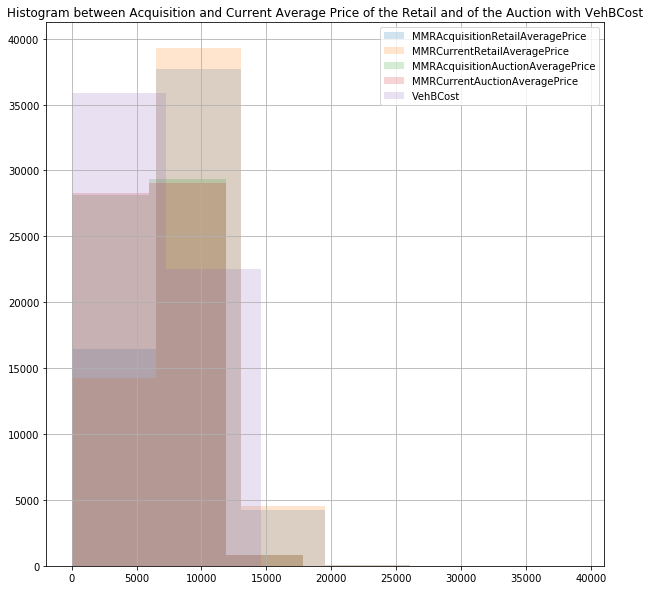

In [0]:
# histogram between Acquisition and Current Average Price of the Retail and of the Auction with VehBCost
df1['MMRAcquisitionRetailAveragePrice'].hist(bins=6, 
                                   label='MMRAcquisitionRetailAveragePrice', alpha=0.2, figsize=(18, 18))
df1['MMRCurrentRetailAveragePrice'].hist(bins=6, 
                                   label='MMRCurrentRetailAveragePrice', alpha=0.2, figsize=(18, 18))
df1['MMRAcquisitionAuctionAveragePrice'].hist(bins=6, 
                                   label='MMRAcquisitionAuctionAveragePrice', alpha=0.2, figsize=(18, 18))
df1['MMRCurrentAuctionAveragePrice'].hist(bins=6, 
                                   label='MMRCurrentAuctionAveragePrice', alpha=0.2, figsize=(18, 18))
df1['VehBCost'].hist(bins=5, 
                                   label='VehBCost', alpha=0.2, figsize=(10, 10))
plt.legend()
plt.title('Histogram between Acquisition and Current Average Price of the Retail and of the Auction with VehBCost')
plt.show()

The histogram describes the normal distribution of the average price classes and the original cost of the vehicles.

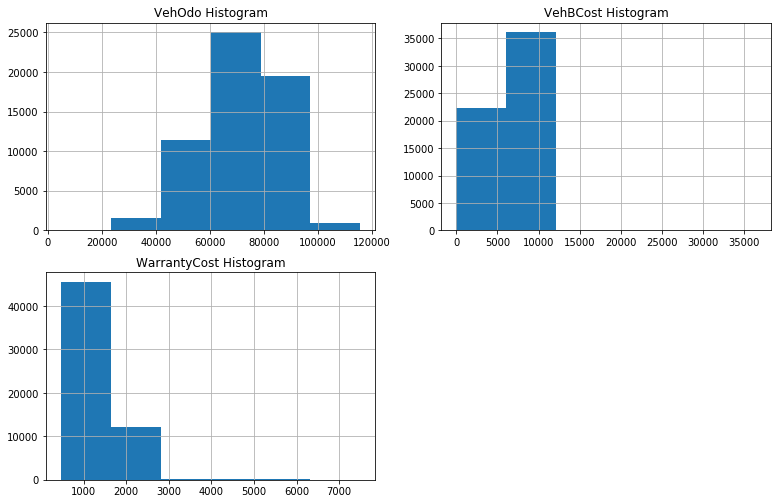

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# VehOdo Histogram
plt.subplot2grid(fig_dims, (0, 0))
df1['VehOdo'].hist(bins=6)
plt.title('VehOdo Histogram')

# VehBCost Histogram
plt.subplot2grid(fig_dims, (0, 1))
df1['VehBCost'].hist(bins=6)
plt.title('VehBCost Histogram')

# WarrantyCost Histogram
plt.subplot2grid(fig_dims, (1, 0))
df1['WarrantyCost'].hist(bins=6)
plt.title('WarrantyCost Histogram')

plt.show()

## Assessing data quality (missing values, outliers) 

In [0]:
# checking for all columns if they contain any missing values
df1.isnull().any()

RefId                                False
IsBadBuy                             False
PurchDate                            False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                  True
SubModel                              True
Color                                 True
Transmission                          True
WheelTypeID                           True
WheelType                             True
VehOdo                               False
Nationality                           True
Size                                  True
TopThreeAmericanName                  True
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentA

In [0]:
# automatic sum of the missing values for every column 
df1.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [0]:
"""the Trim attribute has 3 predominant values among the records: Bas present 11213 times, LS present 8190 times and SE 7473 times
 we want to replace the missing values with one of these 3 values in relation to their occurrence in the dataset
 the number of records in which they are present is 26876 
 we want to assign to missing values the value Bas 42% of the time, LS 30% and SE 28%
 knowing that the missing values in the "Trim" column are 1911 
 the procedure is repeated how many missing values there are"""
r=range(0,1911)
for i in r:
    random.seed() # seed change for pseudo-randomness
    rand=random.random();
    if(rand<= 0,42):
        df1['Trim']=df1['Trim'].fillna(value='Bas',limit=1) # the limit is 1 so that only the first missing value found is replaced
    if (rand> 0,42 and rand<= 0,72) :
        df1['Trim']=df1['Trim'].fillna(value='LS',limit=1)
    if(rand>0,72) :
        df1['Trim']=df1['Trim'].fillna(value='SE',limit=1)

In [0]:
# to delete the missing values from the columns that have few of them, delete the corresponding records
df1=df1[df1['SubModel'].notnull()]
df1=df1[df1['Color'].notnull()]
df1=df1[df1['Nationality'].notnull()]
df1=df1[df1['Size'].notnull()]
df1=df1[df1['TopThreeAmericanName'].notnull()]
# we can replace missing values also with the more frequent value in the column, i.e. the mode 
df1['Transmission']=df1['Transmission'].fillna(df1['Transmission'].mode()[0])
# checking againg the remaining missing values 
df1.isnull().any()
df1.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                     0
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                           2566
WheelType                             2570
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          242
MMRCurrentA

In [0]:
# counting the values, in order to decide how to replace the missing values in this column
df1['WheelType'].value_counts()

Alloy      28734
Covers     26482
Special      589
Name: WheelType, dtype: int64

In [0]:
"""same procedure as before for Trim we have a 1:1 correspondence between WheelTypeID and WheelType (when WheelTypeID!=0.0) 
   so we can replace missing values in the same procedure for them 
   tot=55215 Alloy=52% Covers=48%"""
r=range(0,2566)
df1=df1[df1['WheelTypeID']!=0.0] # in WheelTypeID we have 4 missing values who are represented by 0.0
for i in r:
    random.seed()
    rand=random.random();
    if(rand<= 0,52):
        df1['WheelTypeID']=df1['WheelTypeID'].fillna(value=1.0,limit=1)
        df1['WheelType']=df1['WheelType'].fillna(value="Alloy",limit=1)
    if(rand>0,52) :
        df1['WheelTypeID']=df1['WheelTypeID'].fillna(value=2.0,limit=1)
        df1['WheelType']=df1['WheelType'].fillna(value="Covers",limit=1)
df1.isnull().any()
df1.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                     0
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                              0
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          242
MMRCurrentA

In [0]:
# for the missing values in the MMRCurrent* column, 
# we replace the missing values with the correspondent value in the MMRAcquisition* column 
"""
tmp=df1[df1['MMRCurrentAuctionAveragePrice'].isnull()]
for i in tmp.index:
    df1.loc[i,'MMRCurrentAuctionAveragePrice']=df1.loc[i,'MMRAcquisitionAuctionAveragePrice']
    df1.loc[i,'MMRCurrentAuctionCleanPrice']=df1.loc[i,'MMRAcquisitionAuctionCleanPrice']
    df1.loc[i,'MMRCurrentRetailAveragePrice']=df1.loc[i,'MMRAcquisitionRetailAveragePrice']
    df1.loc[i,'MMRCurrentRetailCleanPrice']=df1.loc[i,'MMRAcquisitonRetailCleanPrice']
df1=df1[df1['MMRCurrentAuctionAveragePrice'].notnull()]
df1.isnull().any()
df1.isnull().sum()  
"""
df1=df1[df1['MMRCurrentAuctionAveragePrice'].notnull()]
df1=df1[df1['MMRCurrentAuctionCleanPrice'].notnull()]
df1=df1[df1['MMRCurrentRetailAveragePrice'].notnull()]
df1=df1[df1['MMRCurrentRetailCleanPrice'].notnull()]

In [0]:
"""we are checking how many values in MMR* column are 0.0 
   this value, 0.0, hide a missing value 
   we replace it with the correspondent VehBCost
s1=0
s2=0
s3=0
s4=0
for i in df1.index :
    if(df1.loc[i,'MMRAcquisitionAuctionAveragePrice']== 0.0):df1.loc[i,'MMRAcquisitionAuctionAveragePrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRAcquisitionAuctionCleanPrice']== 0.0):df1.loc[i,'MMRAcquisitionAuctionCleanPrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRAcquisitionRetailAveragePrice']== 0.0):df1.loc[i,'MMRAcquisitionRetailAveragePrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRAcquisitonRetailCleanPrice']== 0.0):df1.loc[i,'MMRAcquisitonRetailCleanPrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRCurrentAuctionAveragePrice']== 0.0):df1.loc[i,'MMRCurrentAuctionAveragePrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRCurrentAuctionCleanPrice']== 0.0):df1.loc[i,'MMRCurrentAuctionCleanPrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRCurrentRetailAveragePrice']== 0.0):df1.loc[i,'MMRCurrentRetailAveragePrice']=df1.loc[i,'VehBCost']
    if(df1.loc[i,'MMRCurrentRetailCleanPrice']== 0.0):df1.loc[i,'MMRCurrentRetailCleanPrice']=df1.loc[i,'VehBCost']
"""
df1=df1[df1['MMRAcquisitionAuctionAveragePrice']!=0]
df1=df1[df1['MMRAcquisitionAuctionCleanPrice']!=0]
df1=df1[df1['MMRAcquisitionRetailAveragePrice']!=0]
df1=df1[df1['MMRAcquisitonRetailCleanPrice']!=0]
df1=df1[df1['MMRCurrentAuctionAveragePrice']!=0]
df1=df1[df1['MMRCurrentAuctionCleanPrice']!=0]
df1=df1[df1['MMRCurrentRetailAveragePrice']!=0]
df1=df1[df1['MMRCurrentRetailCleanPrice']!=0]


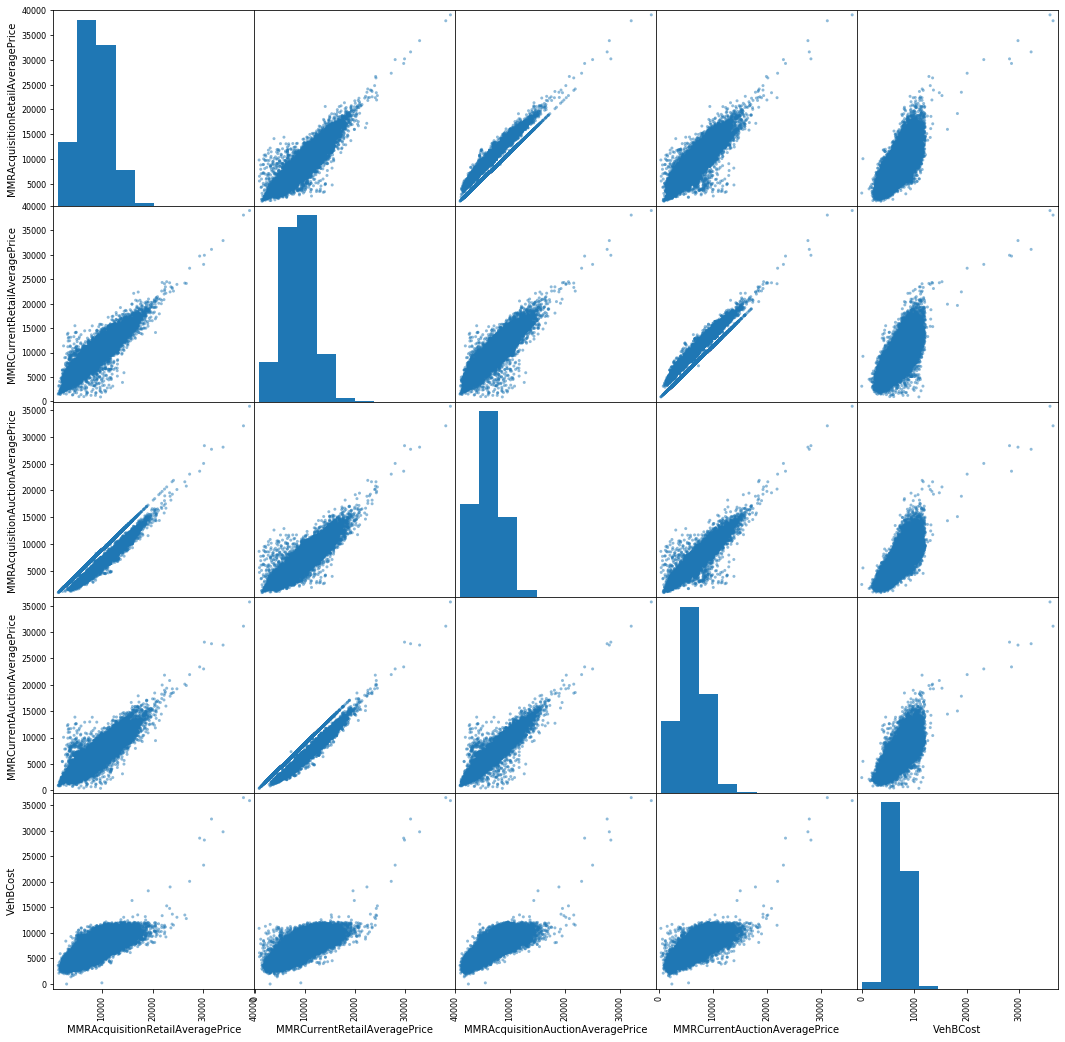

In [0]:
# plotting again correlation between Acquisition and Current Average Price of the Retail and of the Auction with VehBCost
# to understand if something is changed, due to the substitution of the missing values in these columns
pd.plotting.scatter_matrix(df1[['MMRAcquisitionRetailAveragePrice', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionAveragePrice', 'VehBCost']], figsize=(18, 18))
plt.show()

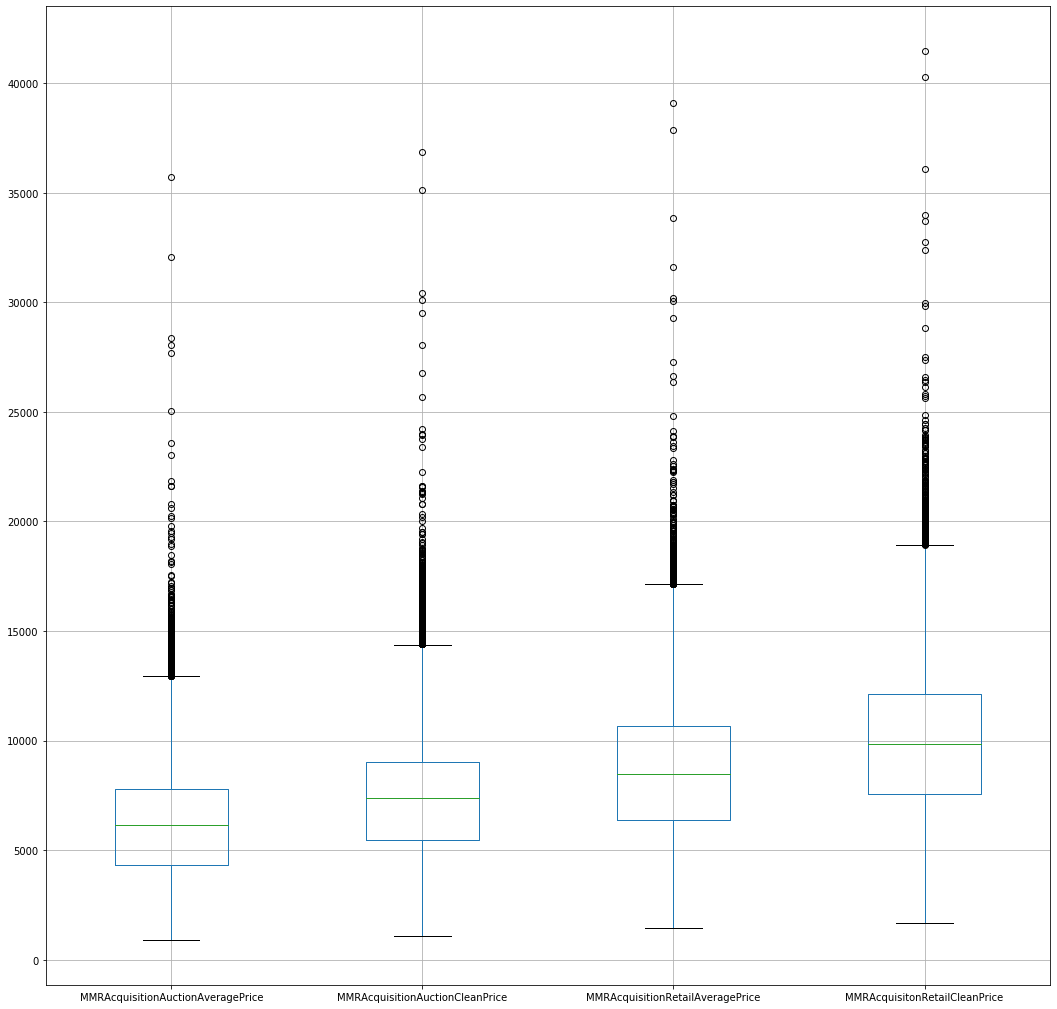

In [0]:
# boxplot of MMRAcquisition*
boxplot = df1.boxplot(column=['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice' ],figsize=(18, 18))

From this boxplot it is possible to notice how many outliers are presents in the price' classes.

Text(0.5, 1.0, 'WarrantyCost boxplot')

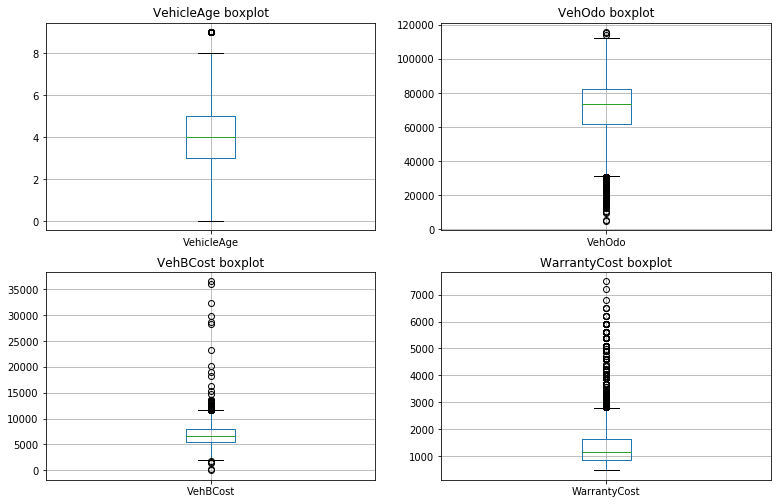

In [0]:
# setting the grid 
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# VehicleAge boxplot
plt.subplot2grid(fig_dims, (0, 0))
boxplot = df1.boxplot(column=['VehicleAge'])
plt.title('VehicleAge boxplot')

# VehOdo boxplot
plt.subplot2grid(fig_dims, (0, 1))
boxplot = df1.boxplot(column=['VehOdo'])
plt.title('VehOdo boxplot')

# VehBCost boxplot
plt.subplot2grid(fig_dims, (1, 0))
boxplot = df1.boxplot(column=['VehBCost'])
plt.title('VehBCost boxplot')

# WarrantyCost boxplot
plt.subplot2grid(fig_dims, (1, 1))
boxplot = df1.boxplot(column=['WarrantyCost'])
plt.title('WarrantyCost boxplot')

Text(0.5, 1.0, 'WarrantyCost violinplot')

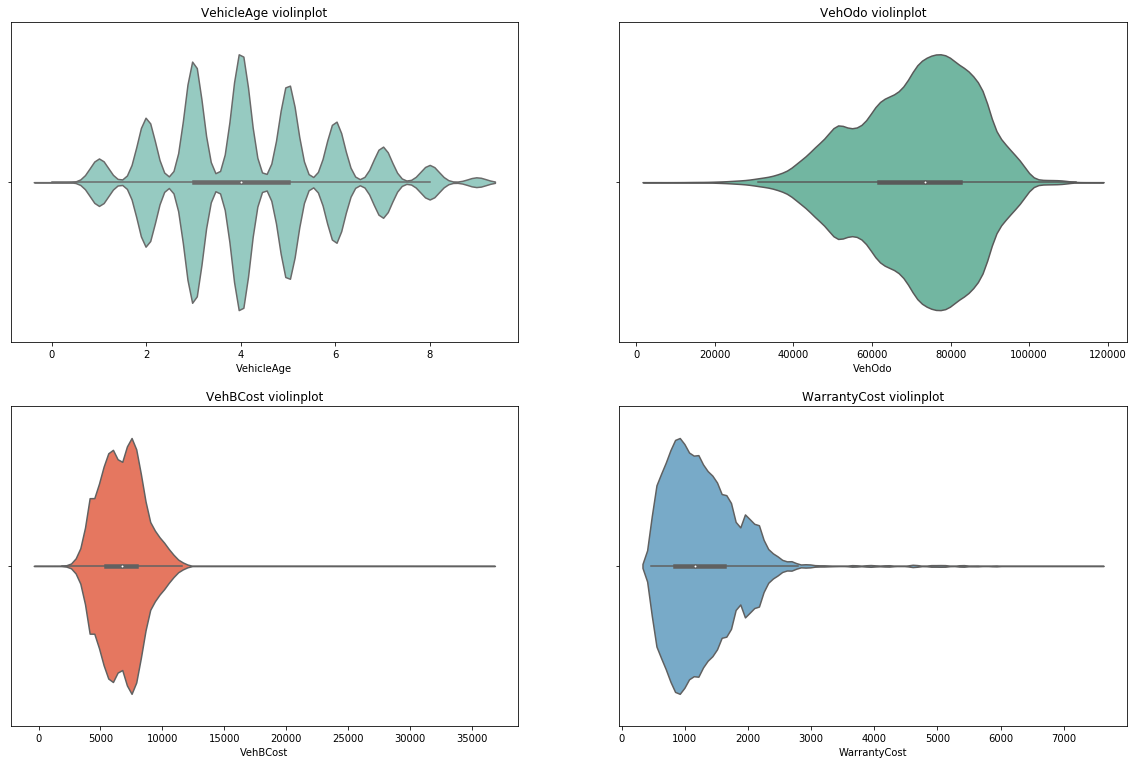

In [0]:
# import seaborn library for using violingplot
import seaborn as sns 
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 2)

# VehicleAge violinplot
plt.subplot2grid(fig_dims, (0, 0))
ax = sns.violinplot(x='VehicleAge', data=df1, palette="Set3")
plt.title('VehicleAge violinplot')

# VehOdo violinplot
plt.subplot2grid(fig_dims, (0, 1))
ax = sns.violinplot(x='VehOdo', data=df1, palette="Set2")
plt.title('VehOdo violinplot')

# VehBCost violinplot
plt.subplot2grid(fig_dims, (1, 0))
ax = sns.violinplot(x='VehBCost', data=df1, palette="Reds")
plt.title('VehBCost violinplot')

# WarrantyCost violinplot
plt.subplot2grid(fig_dims, (1, 1))
ax = sns.violinplot(x='WarrantyCost', data=df1, palette="Blues")
plt.title('WarrantyCost violinplot')


## Variables Transformations, pairwise correlations and eventual elimination of redundant variables 

In [0]:
# changing IsBadBuy and IsOnlineSale into boolean from integer
df1 = df1.astype({"IsBadBuy": object, "IsOnlineSale": bool,"RefId":object,"WheelTypeID":object})

In [0]:
# dropping specific columns because non informative or non relevant or with too many missing values 
df1=df1.drop('BYRNO',axis=1) # not useful
df1=df1.drop('IsOnlineSale',axis=1) # not useful 
df1=df1.drop('WheelType',axis=1) # this attribute is redundant considering WheelTypeID
df1=df1.drop('PRIMEUNIT',axis=1) # total number of missing values: 55703
df1=df1.drop('AUCGUART',axis=1) # total number of missing values: 55703
df1=df1.drop('VehYear',axis=1) # this attribute is obtainable from VehYear and PurchDate, i.e. is redundant

In [0]:
# normalizing the value 'Manual' vs 'MANUAL', as noticed before 
df1['Transmission'] = df1['Transmission'].str.upper() 
df1['Transmission'].value_counts()

AUTO      55436
MANUAL     2010
Name: Transmission, dtype: int64

In [0]:
# MMR*: from 8 values to 4 new columns, because the information was redundant  
# Auction Average: Auction Acquisition - Current Average
# Auction Clean: Auction Acquisition - Current Clean 
# Retail Average: Retail Acquisition - Current Average
# Retail Clean: Retail Acquisition - Current Clean 

# creation of these 4 new columns
"""
df1['ACDifAuctionAveragePrice'] = np.nan
df1['ACDifAuctionCleanPrice'] = np.nan
df1['ACDifRetailAveragePrice'] = np.nan
df1['ACDifRetailCleanPrice'] = np.nan

# compute for each record the value for the new column 
for i in df1.index:
    df1.loc[i,'ACDifAuctionAveragePrice']= df1.loc[i,'MMRAcquisitionAuctionAveragePrice'] - df1.loc[i, 'MMRCurrentAuctionAveragePrice']
    df1.loc[i,'ACDifAuctionCleanPrice']= df1.loc[i,'MMRAcquisitionAuctionCleanPrice'] - df1.loc[i, 'MMRCurrentAuctionCleanPrice']
    df1.loc[i,'ACDifRetailAveragePrice']= df1.loc[i,'MMRAcquisitionRetailAveragePrice'] - df1.loc[i, 'MMRCurrentRetailAveragePrice']
    df1.loc[i,'ACDifRetailCleanPrice']= df1.loc[i,'MMRAcquisitonRetailCleanPrice'] - df1.loc[i, 'MMRCurrentRetailCleanPrice']

# drop the columns that are no longer needed 
df1=df1.drop('MMRAcquisitionAuctionAveragePrice',axis=1)
df1=df1.drop('MMRCurrentAuctionAveragePrice',axis=1)
df1=df1.drop('MMRAcquisitionAuctionCleanPrice',axis=1)
df1=df1.drop('MMRCurrentAuctionCleanPrice',axis=1)
df1=df1.drop('MMRAcquisitionRetailAveragePrice',axis=1)
df1=df1.drop('MMRCurrentRetailAveragePrice',axis=1)
df1=df1.drop('MMRAcquisitonRetailCleanPrice',axis=1)
df1=df1.drop('MMRCurrentRetailCleanPrice',axis=1)
"""

"\ndf1['ACDifAuctionAveragePrice'] = np.nan\ndf1['ACDifAuctionCleanPrice'] = np.nan\ndf1['ACDifRetailAveragePrice'] = np.nan\ndf1['ACDifRetailCleanPrice'] = np.nan\n\n# compute for each record the value for the new column \nfor i in df1.index:\n    df1.loc[i,'ACDifAuctionAveragePrice']= df1.loc[i,'MMRAcquisitionAuctionAveragePrice'] - df1.loc[i, 'MMRCurrentAuctionAveragePrice']\n    df1.loc[i,'ACDifAuctionCleanPrice']= df1.loc[i,'MMRAcquisitionAuctionCleanPrice'] - df1.loc[i, 'MMRCurrentAuctionCleanPrice']\n    df1.loc[i,'ACDifRetailAveragePrice']= df1.loc[i,'MMRAcquisitionRetailAveragePrice'] - df1.loc[i, 'MMRCurrentRetailAveragePrice']\n    df1.loc[i,'ACDifRetailCleanPrice']= df1.loc[i,'MMRAcquisitonRetailCleanPrice'] - df1.loc[i, 'MMRCurrentRetailCleanPrice']\n\n# drop the columns that are no longer needed \ndf1=df1.drop('MMRAcquisitionAuctionAveragePrice',axis=1)\ndf1=df1.drop('MMRCurrentAuctionAveragePrice',axis=1)\ndf1=df1.drop('MMRAcquisitionAuctionCleanPrice',axis=1)\ndf1=df1.d

In [0]:
#State|ZIPC: new column created from VNST and VNZIP1 to compact info about State and ZIP code
df1['State|ZIPC'] = np.nan
df1['VNZIP1']=df1['VNZIP1'].astype(str)
for i in df1.index:
    df1.loc[i,'State|ZIPC']= df1.loc[i,'VNST']+"|"+df1.loc[i,'VNZIP1']
#drop the columns that are no longer needed 
df1=df1.drop('VNZIP1',axis=1)
df1=df1.drop('VNST',axis=1)

In [0]:
# interquartile range or IQR is the difference between the third and the first quartile, 
# i.e. the width of the range of values that contains the "central" half of the values observed
# it's a dispersion index, that is a measure of how far the values move away from a central value
#Una volta pulito il dataframe posso togliere gli outliers
Q1=df1.quantile(0.25) # first quartile
Q3=df1.quantile(0.75) # third quartile
IQR = Q3 - Q1 # difference
IQR # result 

VehicleAge                               2.00
VehOdo                               20615.75
MMRAcquisitionAuctionAveragePrice     3440.00
MMRAcquisitionAuctionCleanPrice       3561.00
MMRAcquisitionRetailAveragePrice      4309.00
MMRAcquisitonRetailCleanPrice         4539.00
MMRCurrentAuctionAveragePrice         3438.00
MMRCurrentAuctionCleanPrice           3563.00
MMRCurrentRetailAveragePrice          4335.00
MMRCurrentRetailCleanPrice            4481.00
VehBCost                              2470.00
WarrantyCost                           786.00
dtype: float64

In [0]:
# deletion of outliers
df1 = df1[~((df1 < (Q1 - 1.1 * IQR)) |(df1 > (Q3 + 1.1* IQR))).any(axis=1)]
df1

,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,State|ZIPC
0,326,1,10/25/2010,ADESA,2,KIA,SPECTRA,EX,4D SEDAN EX,BLUE,...,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,6100.0,533,FL|33619
1,42991,0,5/27/2009,MANHEIM,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,SILVER,...,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,4000.0,1630,FL|32124
2,55273,0,3/18/2010,OTHER,2,DODGE,CALIBER,SE,4D WAGON,BLACK,...,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,7500.0,693,OK|74135
3,29058,0,6/8/2009,OTHER,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,BROWN,...,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,4725.0,1633,AZ|85018
4,34991,0,3/4/2009,MANHEIM,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,BLUE,...,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,5670.0,1623,TX|75236
6,1653,0,5/21/2010,ADESA,5,NISSAN,ALTIMA,Bas,4D SEDAN,WHITE,...,7840.0,9909.0,11769.0,6060.0,7586.0,9518.0,11377.0,7675.0,723,FL|34203
7,40878,0,9/24/2009,MANHEIM,1,DODGE,AVENGER 4C 2.4L I4 S,SE,4D SEDAN,BLUE,...,9228.0,9675.0,10466.0,7965.0,8884.0,11871.0,12554.0,7810.0,920,SC|29532
9,7255,0,6/4/2009,MANHEIM,3,SUZUKI,FORENZA 2.0L I4 EFI,LS,4D SEDAN,MAROON,...,4867.0,4726.0,5756.0,3913.0,4867.0,4726.0,5756.0,4825.0,505,GA|30272
10,63516,0,10/13/2009,MANHEIM,5,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,RED,...,4945.0,4751.0,5841.0,3656.0,4579.0,6895.0,8636.0,5125.0,1503,TN|37210
11,16842,0,2/10/2010,MANHEIM,3,PONTIAC,G6 4C,Bas,4D SEDAN SE1,GREY,...,8933.0,11523.0,13049.0,8220.0,9467.0,11996.0,13259.0,7300.0,764,FL|32824


In [0]:
# save the result in a csv file, to speed up further computations performed in different times 
df1.to_csv("df1_5.csv")